<a href="https://colab.research.google.com/github/pjdoucette/MAT422/blob/main/HW_3_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.7 Neural Networks



---



Key Concepts:


*   Mathematical Formulation
*   Activation Functions
*   Cost Function
*   Backpropagation
*   Backpropagation Algorithm

#### Set up

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



---



### Mathematical Formulation

A simple neural network aims to fit a forecast output, denoted $ \hat{y} $, to input data using an activation function $ \sigma(z) $. For inputs $ x_1 $ and $ x_2 $, and weights $ w_1 $, $ w_2 $, and bias $ b $, we have:
$$
\hat{y} = \sigma(z) = \sigma(w_1 x_1 + w_2 x_2 + b).
$$

For a general neural network, which may have hundreds or thousands of nodes, the values in each layer $ l $ are determined from the previous layer $ l-1 $ using weights $ w $ and biases $ b $. For the $ j' $-th node in the $ l $-th layer:
$$
z^{(l)}_{j'} = \sum_{j=1}^{J_{l-1}} w^{(l)}_{j,j'} a^{(l-1)}_j + b^{(l)}_{j'},
$$
where $ J_{l-1} $ is the number of nodes in layer $ l-1 $.

Using an activation function $ \sigma $, the values in the $ l $-th layer are:
$$
a^{(l)}_{j'} = \sigma(z^{(l)}_{j'}).
$$
In matrix form, this becomes:
$$
z^{(l)} = W^{(l)} a^{(l-1)} + b^{(l)},
$$
and
$$
a^{(l)} = \sigma(z^{(l)}) = \sigma(W^{(l)} a^{(l-1)} + b^{(l)}).
$$

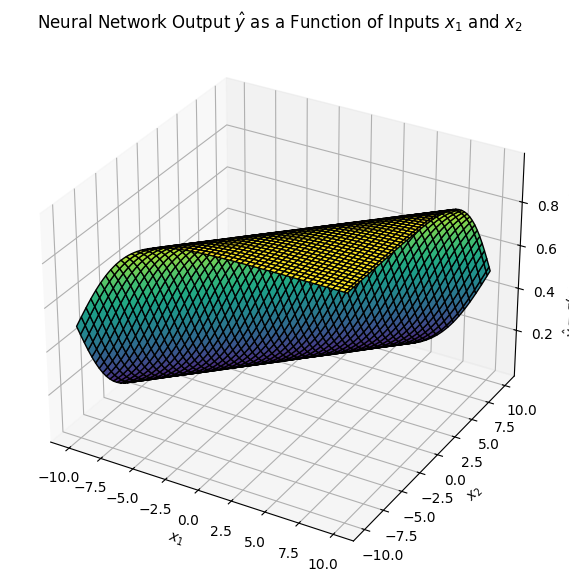

In [ ]:
# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Weights and bias
w1, w2 = 0.5, -0.5
b = 0.0

# Range of input values
x1_vals = np.linspace(-10, 10, 100)
x2_vals = np.linspace(-10, 10, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Calculate the network output
Z = w1 * X1 + w2 * X2 + b
Y_hat = sigmoid(Z)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot of the network output
ax.plot_surface(X1, X2, Y_hat, cmap='viridis', edgecolor='k')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$')
ax.set_title('Neural Network Output $\hat{y}$ as a Function of Inputs $x_1$ and $x_2$')

plt.show()


### Activation Functions

Activation functions abstract the output of a node given an input or set of inputs. Common activation functions include:

1. **Step Function**  
   Defined as:
   $$
   \sigma(x) =
   \begin{cases}
   0, & x < 0, \\
   1, & x \geq 0.
   \end{cases}
   $$
   Often used for binary classification.

2. **ReLU (Rectified Linear Unit)**  
   Positive linear function:
   $$
   \sigma(x) = \max(0, x).
   $$

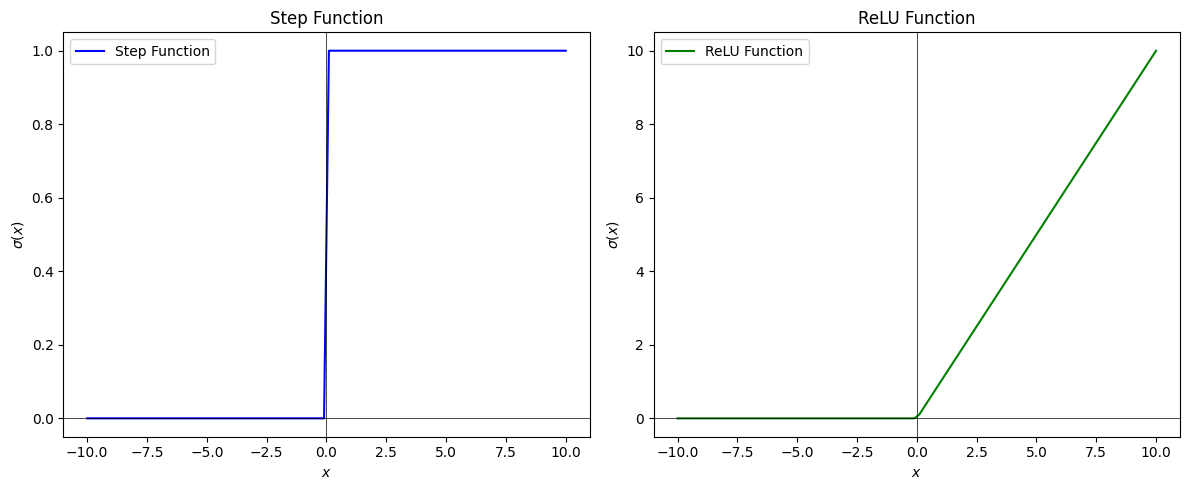

In [ ]:
# Step Function
def step_function(x):
    return np.where(x >= 0, 1, 0)

# ReLU Function
def relu(x):
    return np.maximum(0, x)

# Range of input values for x
x = np.linspace(-10, 10, 100)

# Outputs for each activation function
y_step = step_function(x)
y_relu = relu(x)

# Plot the Step Function
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, y_step, label="Step Function", color='blue')
plt.xlabel("$x$")
plt.ylabel("$\sigma(x)$")
plt.title("Step Function")
plt.axhline(0, color="black",linewidth=0.5)
plt.axvline(0, color="black",linewidth=0.5)
plt.legend()

# Plot the ReLU Function
plt.subplot(1, 2, 2)
plt.plot(x, y_relu, label="ReLU Function", color='green')
plt.xlabel("$x$")
plt.ylabel("$\sigma(x)$")
plt.title("ReLU Function")
plt.axhline(0, color="black",linewidth=0.5)
plt.axvline(0, color="black",linewidth=0.5)
plt.legend()

plt.tight_layout()
plt.show()


### Cost Functon

In training a neural network, we seek to minimize the difference between the predicted output $ \hat{y} $ and the actual output $ y $. This difference is quantified by a cost function, which guides the adjustments in weights and biases.

For a single training example, the cost function $ C $ is often chosen as the Mean Squared Error (MSE), defined as:
$$
C = \frac{1}{2} (\hat{y} - y)^2,
$$
where $\hat{y}$ is the network’s prediction and $y$ is the actual output.

For multiple training examples, the cost function becomes the average of individual costs over all examples. Given $N$ training examples, the total cost function $J$ is:
$$
J = \frac{1}{N} \sum_{i=1}^N \frac{1}{2} (\hat{y}_i - y_i)^2.
$$

In practice, other cost functions are often used, particularly for classification tasks. One popular choice is **Cross-Entropy Loss**, especially effective for binary and multi-class classification. For binary classification with label $ y $ (0 or 1) and prediction $\hat{y}$ (between 0 and 1), cross-entropy loss $L$ is:
$$
L = - \left( y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right).
$$

For multi-class classification, the categorical cross-entropy loss is generalized to:
$$
L = - \sum_{c=1}^{C} y_c \log(\hat{y}_c),
$$
where $C$ is the number of classes, $ y_c $ is the actual label (1 if the class is correct, 0 otherwise), and $\hat{y}_c$ is the predicted probability for each class.


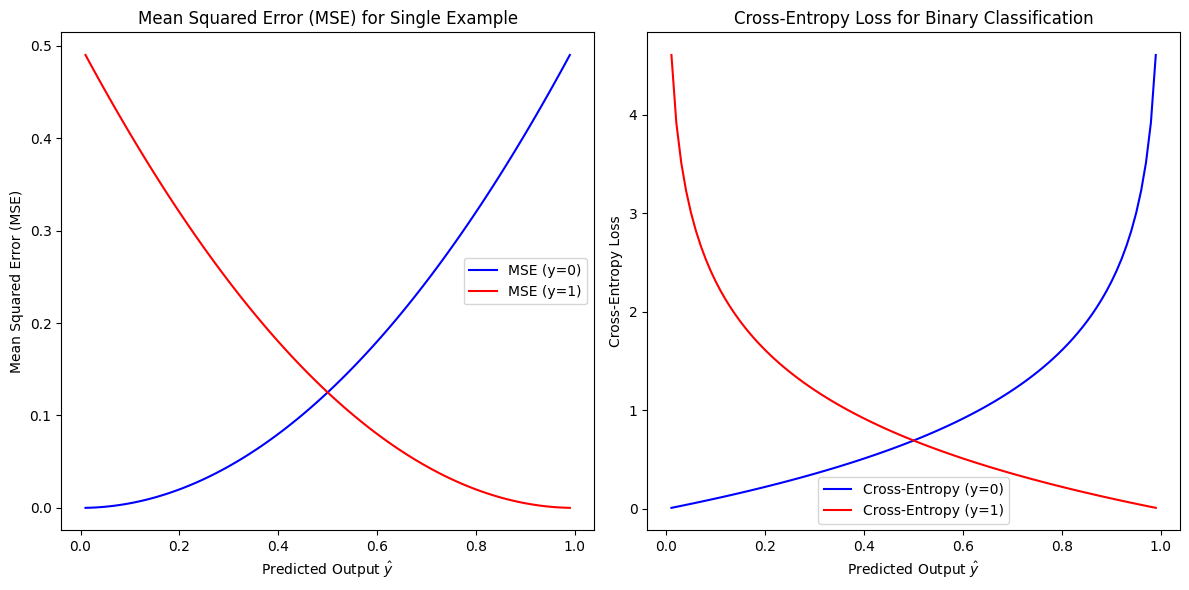

In [ ]:
y_binary_0 = 0  # Actual output for class 0
y_binary_1 = 1  # Actual output for class 1
y_hat = np.linspace(0.01, 0.99, 100)

# Mean Squared Error Cost Function
def mse(y_hat, y):
    return 0.5 * (y_hat - y) ** 2

# Cross-Entropy Loss
def cross_entropy(y_hat, y):
    return -(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

# Calculate MSE f
mse_class_0 = mse(y_hat, y_binary_0)
mse_class_1 = mse(y_hat, y_binary_1)

# Calculate Cross-Entropy Loss
ce_class_0 = cross_entropy(y_hat, y_binary_0)
ce_class_1 = cross_entropy(y_hat, y_binary_1)

plt.figure(figsize=(12, 6))

# Mean Squared Error
plt.subplot(1, 2, 1)
plt.plot(y_hat, mse_class_0, label='MSE (y=0)', color='blue')
plt.plot(y_hat, mse_class_1, label='MSE (y=1)', color='red')
plt.xlabel('Predicted Output $\hat{y}$')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) for Single Example')
plt.legend()

# Cross-Entropy Loss
plt.subplot(1, 2, 2)
plt.plot(y_hat, ce_class_0, label='Cross-Entropy (y=0)', color='blue')
plt.plot(y_hat, ce_class_1, label='Cross-Entropy (y=1)', color='red')
plt.xlabel('Predicted Output $\hat{y}$')
plt.ylabel('Cross-Entropy Loss')
plt.title('Cross-Entropy Loss for Binary Classification')
plt.legend()

plt.tight_layout()
plt.show()


### Backpropagation

Backpropagation is an algorithm used to minimize the cost function by adjusting the weights and biases in a neural network. It computes the gradient of the cost function with respect to each parameter by applying the chain rule, working backwards from the output layer to each previous layer.

For each training example, the backpropagation process includes the following steps:

1. **Feedforward Pass**  
   Compute the activations for each layer using the current weights and biases to obtain the predicted output $\hat{y}$.

2. **Compute Output Error**  
   At the output layer, compute the error $\delta^{(L)}$, which represents the difference between the predicted and actual outputs. For the Mean Squared Error (MSE) cost function, this is given by:
   $$
   \delta^{(L)} = \nabla_a C \odot \sigma'(z^{(L)}),
   $$
   where $\nabla_a C$ is the partial derivative of the cost function with respect to the output activations $a^{(L)}$, $\sigma'$ is the derivative of the activation function, and $\odot$ denotes element-wise multiplication.

3. **Backpropagate the Error**  
   For each layer $l$ from $L-1$ down to 1, compute the error $\delta^{(l)}$ by propagating the error from the next layer:
   $$
   \delta^{(l)} = ((W^{(l+1)})^T \delta^{(l+1)}) \odot \sigma'(z^{(l)}),
   $$
   where $W^{(l+1)}$ is the weight matrix of layer $l+1$.

4. **Compute Gradients**  
   The gradients of the cost function with respect to the weights $W^{(l)}$ and biases $b^{(l)}$ are computed as:
   $$
   \frac{\partial C}{\partial W^{(l)}} = \delta^{(l)} (a^{(l-1)})^T,
   $$
   $$
   \frac{\partial C}{\partial b^{(l)}} = \delta^{(l)}.
   $$

5. **Update Parameters**  
   Using the gradients calculated for each layer, update the weights and biases with a learning rate $\eta$:
   $$
   W^{(l)} := W^{(l)} - \eta \frac{\partial C}{\partial W^{(l)}},
   $$
   $$
   b^{(l)} := b^{(l)} - \eta \frac{\partial C}{\partial b^{(l)}}.
   $$

By iteratively applying backpropagation on batches of training data, the neural network adjusts its parameters to reduce the overall cost, improving its predictions over time.

### Backpropogation Algorithm

The backpropagation algorithm systematically applies the process of calculating errors and updating weights and biases across multiple layers in a neural network. Here’s a step-by-step outline of the backpropagation algorithm:

1. **Initialize Weights and Biases**  
   Randomly initialize weights $W^{(l)}$ and biases $b^{(l)}$ for each layer $l$ in the network.

2. **Feedforward Pass**  
   For each training input $x$, perform a forward pass to calculate the activations $a^{(l)}$ in each layer, using:
   $$
   a^{(l)} = \sigma(z^{(l)}), \quad z^{(l)} = W^{(l)} a^{(l-1)} + b^{(l)}.
   $$

3. **Calculate Output Error**  
   At the output layer $L$, calculate the error $\delta^{(L)}$:
   $$
   \delta^{(L)} = \nabla_a C \odot \sigma'(z^{(L)}),
   $$
   where $\nabla_a C$ represents the derivative of the cost function with respect to the output activation.

4. **Backpropagate the Error**  
   For each layer $l$ from $L-1$ to 1, calculate the error term $\delta^{(l)}$ as:
   $$
   \delta^{(l)} = ((W^{(l+1)})^T \delta^{(l+1)}) \odot \sigma'(z^{(l)}).
   $$

5. **Compute Gradients**  
   For each layer $l$, compute the gradients of the cost function with respect to weights $W^{(l)}$ and biases $b^{(l)}$:
   $$
   \frac{\partial C}{\partial W^{(l)}} = \delta^{(l)} (a^{(l-1)})^T,
   $$
   $$
   \frac{\partial C}{\partial b^{(l)}} = \delta^{(l)}.
   $$

6. **Update Weights and Biases**  
   Update the weights and biases using the gradients computed above with a learning rate $\eta$:
   $$
   W^{(l)} := W^{(l)} - \eta \frac{\partial C}{\partial W^{(l)}},
   $$
   $$
   b^{(l)} := b^{(l)} - \eta \frac{\partial C}{\partial b^{(l)}}.
   $$

7. **Repeat for Each Training Example**  
   Repeat steps 2-6 for each training example in the dataset or process multiple examples in a batch.

8. **Iterate Until Convergence**  
   Continue iterating through the dataset until the cost function reaches a minimal threshold, or until the improvement between iterations is sufficiently small.

This iterative application of the backpropagation algorithm enables the neural network to adjust its parameters to minimize the cost function and improve its performance on the training data.
